In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Synthetic_Software_Sales_Data_OG.csv')

In [ ]:
df.columns #understanding data

Index(['Date of Sale', 'Region', 'Product Type', 'Sales Channel',
       'Customer Type', 'Sales Amount in US$', 'Units Sold',
       'Marketing Spend in US$', 'Returning Customer'],
      dtype='object')

In [ ]:
df.info(1) #understanding data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date of Sale            3650 non-null   object 
 1   Region                  3650 non-null   object 
 2   Product Type            3650 non-null   object 
 3   Sales Channel           3650 non-null   object 
 4   Customer Type           3650 non-null   object 
 5   Sales Amount in US$     3650 non-null   float64
 6   Units Sold              3650 non-null   float64
 7   Marketing Spend in US$  3650 non-null   float64
 8   Returning Customer      3650 non-null   object 
dtypes: float64(3), object(6)
memory usage: 256.8+ KB


In [ ]:
df['Product Type'].value_counts() #understanding data

Product Type
CRM          762
DevTools     746
Database     717
ERP          713
Antivirus    712
Name: count, dtype: int64

In [ ]:
df['Sales Channel'].value_counts() #understanding data

Sales Channel
Online          1248
Partner         1204
Direct Sales    1198
Name: count, dtype: int64

In [ ]:
df['Customer Type'].value_counts() #understanding data

Customer Type
Consumer    1859
Business    1791
Name: count, dtype: int64

In [ ]:
df['Returning Customer'].value_counts() #understanding data

Returning Customer
No     1827
Yes    1823
Name: count, dtype: int64

In [ ]:
df['Region'].value_counts() #understanding data

Region
South America    755
Australia        748
North America    743
Europe           704
Asia             700
Name: count, dtype: int64

In [ ]:
df.head(5) #understanding data

,Date of Sale,Region,Product Type,Sales Channel,Customer Type,Sales Amount in US$,Units Sold,Marketing Spend in US$,Returning Customer,Date,Quater,Month
0,01-01-2022,South America,CRM,Partner,Business,7723.0,16,793.0,Yes,2022-01-01,1,January
1,02-01-2022,Australia,DevTools,Partner,Consumer,8681.0,15,725.0,Yes,2022-01-02,1,January
2,03-01-2022,Asia,DevTools,Partner,Consumer,5240.0,8,587.0,No,2022-01-03,1,January
3,04-01-2022,Australia,Database,Partner,Business,9933.0,15,1810.0,Yes,2022-01-04,1,January
4,05-01-2022,Australia,CRM,Online,Consumer,215.0,1,933.0,Yes,2022-01-05,1,January


# **Drop Blank/NA Data**

In [ ]:
df.dropna(inplace=True) #Droping NA values, with inplace arrgument set to True

***Done chekcing all columns for na or null values. all retured zero count. hence data is valid now.***

# **Standardize Data Stage**

In [ ]:
df['Units Sold'] = df['Units Sold'].astype(int) #new column creationm and setting an data type for the same


In [ ]:
df['Date'] = pd.to_datetime(df['Date of Sale'], format='mixed', dayfirst=True, errors='coerce') #this will take care of date format. Give date is not in month date year format.


# **Lets Check for Outliners**

<Axes: xlabel='Units Sold'>

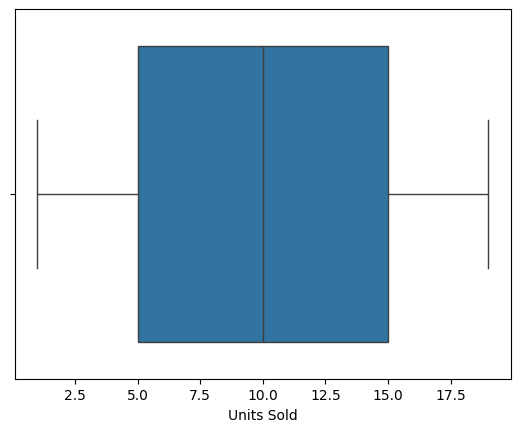

In [ ]:
sns.boxplot(x=df['Units Sold']) #drawing an box plot

<Axes: xlabel='Sales Amount in US$'>

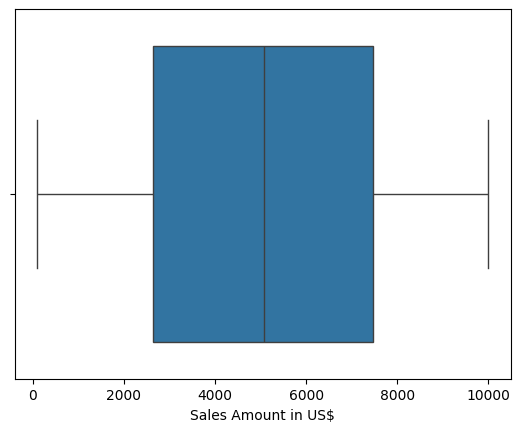

In [ ]:
sns.boxplot(x=df['Sales Amount in US$']) #drawing an box plot

<Axes: xlabel='Marketing Spend in US$'>

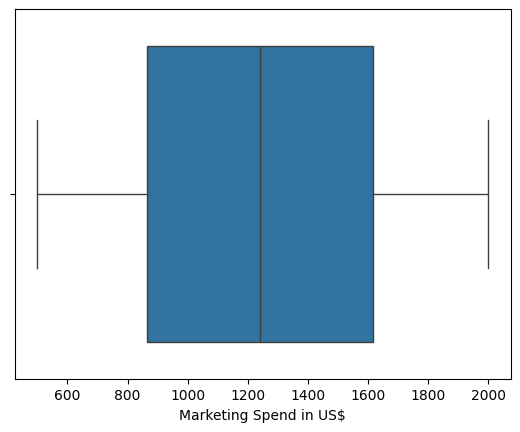

In [ ]:
sns.boxplot(x=df['Marketing Spend in US$']) #drawing an box plot

# **Lets Create New column which will be required for analysis.**

**Date to Quater:**

In [ ]:
df['Quater'] = pd.to_datetime(df['Date']).dt.quarter #converting date to quater and making new to column

In [ ]:
df['Date'] #understanding data

0      2022-01-01
1      2022-01-02
2      2022-01-03
3      2022-01-04
4      2022-01-05
          ...    
3645   2022-12-27
3646   2022-12-28
3647   2022-12-29
3648   2022-12-30
3649   2022-12-31
Name: Date, Length: 3650, dtype: datetime64[ns]

In [ ]:
df['Month'] = pd.to_datetime(df['Date']).dt.month_name(locale = '') # extraction from data of month

In [ ]:
df['Profit'] = (df['Sales Amount in US$']-df['Marketing Spend in US$']) # calculation for new column 'Profit'
df['Profit'].astype(int) # setting data type

0       6930
1       7956
2       4653
3       8123
4       -718
        ... 
3645    4582
3646    1209
3647    1036
3648    3239
3649   -1480
Name: Profit, Length: 3650, dtype: int64

In [ ]:
df.head(5) #understanding data

,Date of Sale,Region,Product Type,Sales Channel,Customer Type,Sales Amount in US$,Units Sold,Marketing Spend in US$,Returning Customer,Date,Quater,Month,Profit
0,01-01-2022,South America,CRM,Partner,Business,7723.0,16,793.0,Yes,2022-01-01,1,January,6930.0
1,02-01-2022,Australia,DevTools,Partner,Consumer,8681.0,15,725.0,Yes,2022-01-02,1,January,7956.0
2,03-01-2022,Asia,DevTools,Partner,Consumer,5240.0,8,587.0,No,2022-01-03,1,January,4653.0
3,04-01-2022,Australia,Database,Partner,Business,9933.0,15,1810.0,Yes,2022-01-04,1,January,8123.0
4,05-01-2022,Australia,CRM,Online,Consumer,215.0,1,933.0,Yes,2022-01-05,1,January,-718.0


In [ ]:
df.to_csv('df_sales_synthetic_data - 20-07-2024.csv') #writing cleaned data to csv